# Project 2: Thera Bank Personal Loan Campaign
 
## Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

## Domain:
Banking

 

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

 

## Attribute Information:
    ID: Customer ID
    Age: Customer's age in completed years
    Experience: #years of professional experience
    Income: Annual income of the customer ($000)
    ZIP Code: Home Address ZIP
    Family: Family size of the customer
    CCAvg: Avg. spending on credit cards per month ($000)
    Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
    Mortgage: Value of house mortgage if any. ($000)
    Personal Loan: Did this customer accept the personal loan offered in the last campaign?
    Securities Account: Does the customer have a securities account with the bank?
    CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
    Online: Does the customer use internet banking facilities?
    Credit card: Does the customer use a credit card issued by the bank?
 
 
## Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 
## Steps and tasks:

1.  Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
    Number of unique in each column?
    Number of people with zero mortgage?
    Number of people with zero credit card spending per month?
    Value counts of all categorical columns.
    Univariate and Bivariate
    Get data model ready

3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

6. Give conclusion related to the Business understanding of your model? (5 marks)

# Coding Starts Here

## Import Libraries and Load Dataset and basic data checks

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets import everything we will need

import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#To break the X and y dataframes into training set and test set we will need
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
#Lets load the Data csv file
cust_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
cust_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#info,shape, statistical summary, null check, incorrect imputation for Cust Data

cust_data.info()
print('')
print ('shape:', cust_data.shape)
print('')
print('size:', cust_data.size)

print(' ')

# check if there are any missing values in Cust data via boolean
print("show the customer data with boolean: \n", cust_data.isnull())

# Count total NaN / missing values at each column for cust data
print(" \nCount total missing values at each column in a DataFrame : \n\n"), 
print( pd.DataFrame(cust_data.isnull().sum(), columns = ['Number of missing values']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB

shape: (5000, 14)

size: 70000
 
show the customer data

There are 5000 rows of data with 14 features/columns and there seems there are no Null values. 

In [5]:
#Analysing the distribution of the various attributes like min, max, mean, count, 25th percentile, median, 75th percentile
cust_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
cust_data.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

Insights
- There are many categorical variables/columns in this dataset
- Zip code has values of very different magnitude. it will be interesting to see how that play into the model
- Most of the Classification variables like have already been encoded with numercial values. 
- There is something wrong with the experience data as it looks to have negative values which is not possible. we will do more on that in the EDA section

## Start of EDA and Univariate Analysis

In this EDA section, I am going to try to further understand the data by doing Statistical, Univariate and Bivariate Analysis. While doing this analysis I will remove or add columns/data that is not relevant or relevant for this modelling. By the end of the EDA, the objective will be to be ready with the Data model or models in case i want to have several models to compare.

In [7]:
#Lets do a quick check again on the data
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Its very clear that all the variables are of int type except CCAvg. Also there does not seem to be any Null values, however we will check if any imputation is needed incase the values are not very helpful for any of the columns.

But before we do that lets quickly answer some questions

 - Number of unique in each column? 
 - Number of people with zero mortgage? 
 - Number of people with zero credit card spending per month? 
 - Value counts of all categorical columns.

In [8]:
#Number of unique in each column? 

cust_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
 #Number of people with zero mortgage? 

total = 0

for i in range(len(cust_data)):

    if cust_data['Mortgage'].values[i] == 0:
        total = total +1 

print("Number of people with zero mortgage:", total)

Number of people with zero mortgage: 3462


In [10]:
#Number of people with zero credit card spending per month? 

total_zerocc = 0

for i in range(len(cust_data)):

    if cust_data['CCAvg'].values[i] == 0:
        total_zerocc = total_zerocc +1 

print("Number of people with zero credit card spending:", total_zerocc)

Number of people with zero credit card spending: 106


In [11]:
#Lets doa a quick Value counts of all columns to try to identify which of them are categorical columns. 
#I will also do some plotting once I
#have a better idea which ones are the categorical columns

for i in cust_data.columns:
      print(cust_data[i].value_counts())
      print()

2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12

Based on the value counts above, i believe i can divide the variables in the following categories. we will further verfiy this when we do some plots 
 
 Continuous
    - Age
    - Experience
    - Income
    - Mortgage
    - CCAvg
    
  Categorical
    - Family
    - Education
    - Securities Account
    - CD Account
    - Online
    - CreditCard
    - Mortgage Account (New)

Lets also check the measures of dispersion including skewness of the data and also any correlation between the fields that we can identify

In [12]:
#Lets check the skewness of the data
cust_data.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [13]:
# lets do a quick correlation related to the target variable and also do a overall correlation heat map
cust_data[cust_data.columns[:]].corr()['Personal Loan'][:]

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

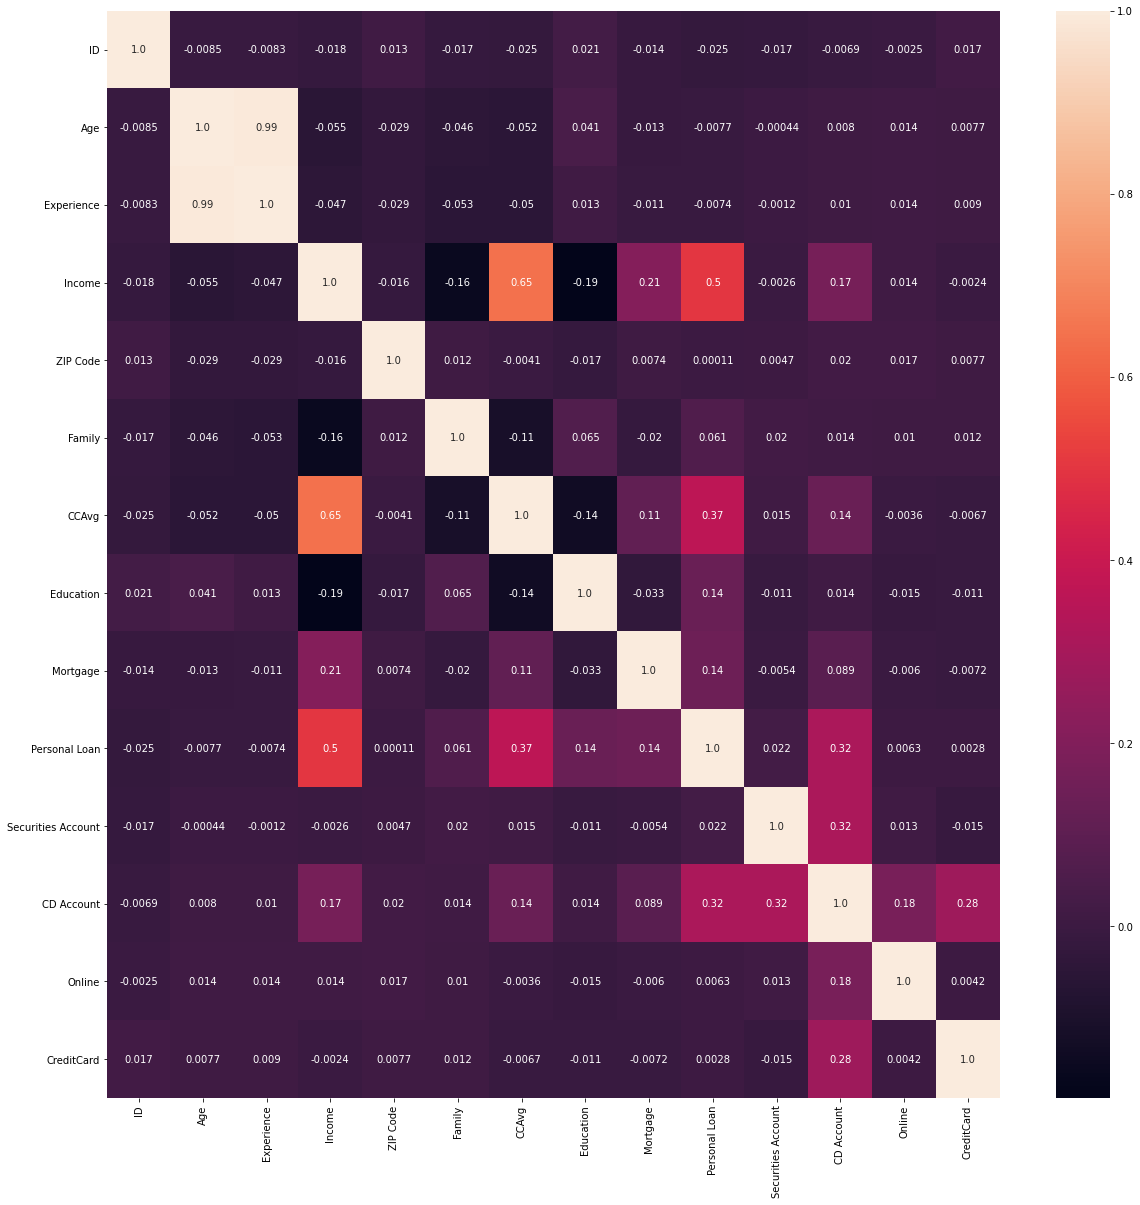

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(cust_data.corr(), annot=True, fmt=".2")
plt.show()

I dont think the skewness and correlation tells us much other than the fact that Income, CC Avg and CD account (yes or no) has the most correlation with the Personal Loan dependednt variable. we will do some more bivarate analysis further to see the relation. As for now I am still questioning the need for Zip code. we will see if we remove that later

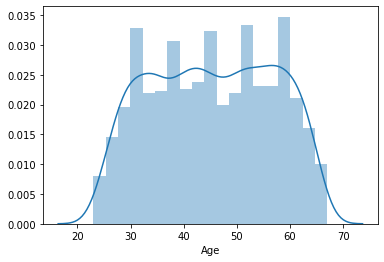

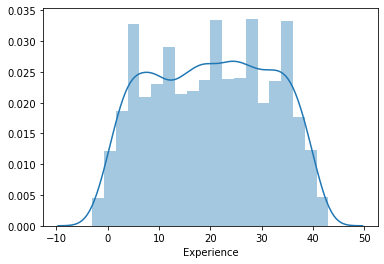

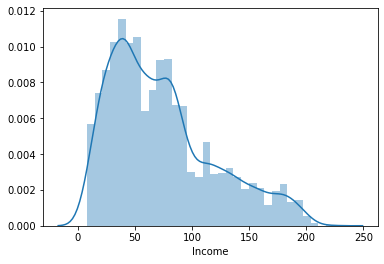

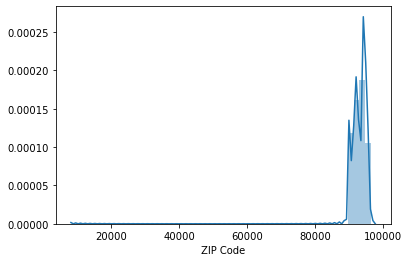

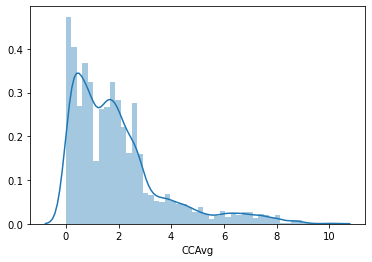

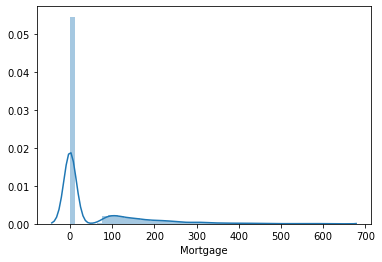

In [15]:
# distplot for continous columns
for i in ['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']:
    sns.distplot(cust_data[i], kde = True)
    plt.show()

There seems to be a lot of skewness in some of the data plots above but that is to be expected. Plots for Experience, age, and income seem to have less skewness. the only features i think might need some changes are zip code (almost no skewness) and mortgage (very skewed). We will not like to touch other data or we might introduce bias in the mode. We will see how to adjust the zip code and mortgage when we do further EDA analysis

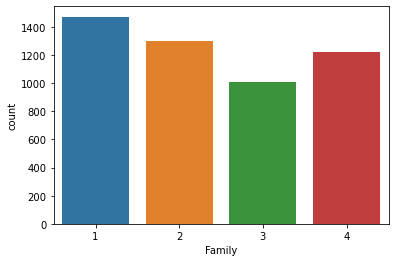

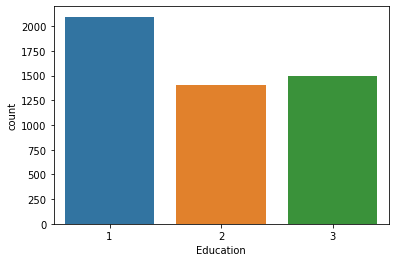

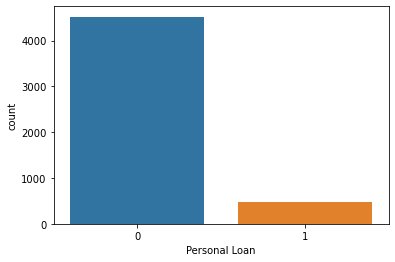

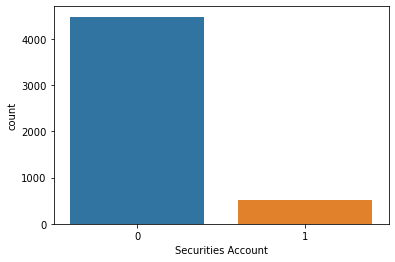

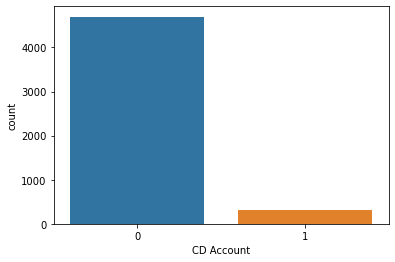

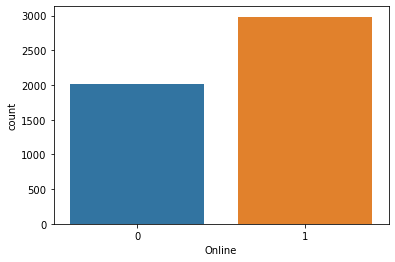

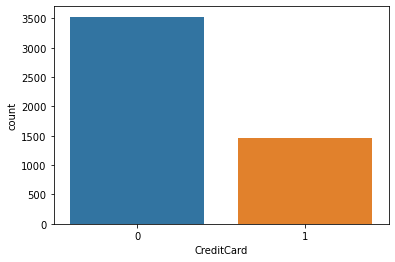

In [16]:
# distplot for categorical columns
for i in ['Family', 'Education', 'Personal Loan','Securities Account','CD Account', 'Online', 'CreditCard']:
    sns.countplot(cust_data[i])
    plt.show()

The above plots confirm our findings on which features are categorical. it also seems that most of the customers dont have securities account, CD account, personal loan, Overall I do not think any treatment is needed.

In [17]:
#while we are at it lets convert the categorical variables to "category" type
cust_data['Family'] = cust_data['Family'].astype('category')
cust_data['Education'] = cust_data['Education'].astype('category')
cust_data['Securities Account'] = cust_data['Securities Account'].astype('category')
cust_data['CD Account'] = cust_data['CD Account'].astype('category')
cust_data['Online'] = cust_data['Online'].astype('category')
cust_data['CreditCard'] = cust_data['CreditCard'].astype('category')
cust_data['Personal Loan'] = cust_data['Personal Loan'].astype('category')


In [18]:
#before making any more conclusions lets do a describe one more time. 
#I want to see if i can see some other things i might have missed
cust_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0


In [19]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.5 KB


In [20]:
#Lets quickly look at the values for Experience that are negative
Exp= cust_data.loc[cust_data['Experience'] < 0]

In [21]:
Exp.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [22]:
#Lets quickly look at the values for Experience do young people actually have.
cust_data.loc[(cust_data['Age'] >= 26) & (cust_data['Age'] < 28)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
85,86,27,2,109,94005,4,1.8,3,0,0,0,0,0,0
151,152,26,0,132,92834,3,6.5,3,0,1,0,0,0,1
156,157,26,0,15,92131,4,0.4,1,0,0,0,0,0,1
165,166,27,1,43,94706,1,1.5,1,0,0,0,0,1,0
169,170,27,1,112,90503,4,2.1,3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,4901,26,1,74,90028,4,2.2,1,0,0,0,0,1,0
4901,4902,26,0,54,96094,3,1.1,2,0,0,0,0,1,0
4934,4935,26,0,85,93950,2,1.6,3,0,0,0,0,1,1
4943,4944,26,0,12,96003,1,0.1,2,0,0,0,0,1,0


Here are my thoughts after all the analysis above

1. There seems to be incorrect negative values for the Experience column as there can be no negative experience. Just by looking at the data it seems that the young people have low experience. it does not make sense to impute mean in the negative values for experience. more than like the the negative sign is a typo and we will just remove it. 

2. I do not think Zip code is playing a hand here although from a overall marketing perspective i can think of a situation where bank will like to advertize harder in certain zip codes versus other. However I have decided not to use zip code in my models.

3. Finally i feel that a mortagage categorical variable will also help put this data in context and I will be interested to see if it helps in modelling. 

4. Family, Education, Personal Loan, Securities Amount, CD Account, Online, Credit card are all categorical

5. The ID column has all unique values and would not provide any help in our modelling. so it is best to drop it

In [23]:
#Cleanup the experience data and make it all positive
for i in range(len(cust_data)):

    if cust_data['Experience'].values[i] < 0:
        
        #print (cust_data['Experience'].values[i])
        cust_data['Experience'].values[i] = (cust_data['Experience'].values[i]) * -1

# Bivariate Analysis

Since in this project we are going to apply Logistic Regression based on the objective we will now perform some Bivariate Analysis where I will see how each attribute is different when Personal Loan is yes or not.
- Based on our class learnings we ll have to use groupby and crosstabs.
- Essentially we will compare the Target Variable (Personal Loan) to other Continuous and Categorical Variables:

  Continuous
    - Age
    - Experience
    - Income
    - Mortgage
    - CCAvg
    
    Catogorical
    - Family
    - Education
    - Securities Account
    - CD Account
    - Online
    - CreditCard
    - Mortgage Account (New)

In [24]:
# Let us look at the target column which is 'Personal Loan' to 
#understand how the data is distributed amongst the various values
cust_data.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
Personal Loan,,,,,,,
0,2512.165487,45.367257,20.165487,66.237389,93152.428761,1.729009,51.789381
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


In [25]:
cust_data.groupby(["Personal Loan"]).median()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
Personal Loan,,,,,,,
0,2518.5,45.0,20.0,59.0,93437.0,1.4,0.0
1,2342.0,45.0,20.0,142.5,93407.0,3.8,0.0


This confirms that Zip code should not be used in our models and that a mortgage categorical classification will be helpful 

In [26]:
pd.crosstab(cust_data['Family'],cust_data['Personal Loan'],normalize='columns')

Personal Loan,0,1
Family,,
1,0.301991,0.222917
2,0.263274,0.220833
3,0.194027,0.277083
4,0.240708,0.279167


Does not seem how many family members the individual has affects whether they take the personal loan or not. We will find more during modelling. 

In [27]:
pd.crosstab(cust_data['Education'],cust_data['Personal Loan'],normalize='columns')

Personal Loan,0,1
Education,,
1,0.443142,0.193750
2,0.270133,0.379167
3,0.286726,0.427083


Its clear the more education the user has the more they customers took a personal loan, but the relationship is not very strong but is an important factor in the variable.

There is one more thing. I was tempted to break the Education column into 3 columns and encode them with 0 or 1 for Education level 1, 2, or 3. I could use get_dummies for this as I will do later but thought what if someone has Advanced degree then they have grad and undergrad as well. this will mean i will have to do special encoding. However that will be making an assumption that i do not want to make as it is feasible although improbable that someone who got an advanced degree never received a graduate degree. I just wanted to make clear that this is my assumption. 

In [28]:
pd.crosstab(cust_data['Securities Account'],cust_data['Personal Loan'],normalize='columns')

Personal Loan,0,1
Securities Account,,
0,0.897788,0.875
1,0.102212,0.125


In [29]:
pd.crosstab(cust_data['CD Account'],cust_data['Personal Loan'],normalize='columns')

Personal Loan,0,1
CD Account,,
0,0.964159,0.708333
1,0.035841,0.291667


Seems like since not a lot of customers do not have Securities account and CD account, most of the customers that do take the loan do not have these accounts. It will be interesting to see how these features affect the model or not.

In [30]:
pd.crosstab(cust_data['Online'],cust_data['Personal Loan'],normalize='columns')

Personal Loan,0,1
Online,,
0,0.404204,0.39375
1,0.595796,0.60625


In [31]:
pd.crosstab(cust_data['CreditCard'],cust_data['Personal Loan'],normalize='columns')

Personal Loan,0,1
CreditCard,,
0,0.706416,0.702083
1,0.293584,0.297917


Having a credit card does not seems to have a very strong impact if the user takes a personal loan but will see how this feature impact the final model by looking at the coefficients 

In [32]:
#adding a new Mortgage category as we decided to do that before
cust_data = cust_data.assign(Mortgage_Account = cust_data['Mortgage'] / cust_data['Mortgage'])

In [33]:
cust_data['Mortgage_Account'] = cust_data['Mortgage_Account'].fillna(0)

In [34]:
cust_data['Mortgage_Account'] = cust_data['Mortgage_Account'].astype('int')

In [35]:
cust_data['Mortgage_Account'] = cust_data['Mortgage_Account'].astype('category')

In [36]:
cust_data['Personal Loan'] = cust_data['Personal Loan'].astype('category')

In [37]:
pd.crosstab(cust_data['Mortgage_Account'],cust_data['Personal Loan'],normalize='columns')

Personal Loan,0,1
Mortgage_Account,,
0,0.696903,0.65
1,0.303097,0.35


### Lets cleanup and prepare the data based on the insights

In [38]:
#Build the first model
cust_data_model1 = cust_data.copy()

In [39]:
#Build the second model
cust_data_model2 = cust_data.copy()

In [40]:
#Dropping ID in both first and second model
cust_data_model1.drop('ID', axis = 1, inplace = True)

In [41]:
cust_data_model2.drop('ID', axis = 1, inplace = True)

In [42]:
#Dropping just the zip code on the second model
cust_data_model1.drop(['ZIP Code'], axis = 1, inplace = True)

In [43]:
#Dropping the zip code, securities account and CD account on the second model
cust_data_model2.drop(['ZIP Code', 'Securities Account', 'CD Account', 'CreditCard'], axis = 1, inplace = True)

In [44]:
#lets check the data types on both models to make sure we have not broken anything
cust_data_model1.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
Mortgage_Account      category
dtype: object

In [45]:
cust_data_model2.dtypes

Age                    int64
Experience             int64
Income                 int64
Family              category
CCAvg                float64
Education           category
Mortgage               int64
Personal Loan       category
Online              category
Mortgage_Account    category
dtype: object

**Cleanup complete:**

- At this point we are done with the cleanup. we will just check everything one more time to make sure everything looks OK

In [46]:
for i in list(cust_data_model1.columns[cust_data_model1.dtypes=='category']):   # checking value counts of all object type columns
    print(cust_data_model1[i].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64

0    3462
1    1538
Name: Mortgage_Account, dtype: int64



In [47]:
for i in list(cust_data_model2.columns[cust_data_model2.dtypes=='category']):   # checking value counts of all object type columns
    print(cust_data_model2[i].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3462
1    1538
Name: Mortgage_Account, dtype: int64



I do see imbalances in the data but i do not think any more treatment is required

## <a id = "link3"></a> Null Values Treatment

There are no Null values and hence no treatement is required

## <a id = "link6"></a> Model building using Logistic Regression from Sklearn 

We will use the sklearn library to build the model and make predictions

I am going to build two models trying to detect which one gives me the best results. the models i will be using are the followings:

- cust_data_model1
- cust_data_model2

### LOGISTIC REGRESSION model for Customer data model 1

In [48]:
#first lets copy the data into a new model dataframe
cust_model1 = cust_data_model1.copy()

In [49]:
#Lets quickly check this dataframe to make sure our copy went well :-)
cust_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  Mortgage_Account    5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 235.4 KB


In [50]:
# Defining our X and Y variables so we can start building our logistic regression model.  we need to drop the dependent var
# from the X variable and put it in the Y varaible. also make sure it is a categorical variable 

X = cust_model1.drop('Personal Loan', axis=1)
Y = cust_model1['Personal Loan'].astype('category')     


In [51]:
#lets quickly check X
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Mortgage_Account
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,1,0,1
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0


In [52]:
#lets quickly check Y
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: category
Categories (2, int64): [0, 1]

In [53]:
#Convert categorical vriables to dummy variables. also doing the drop first to get rid of unecessary columns 
X = pd.get_dummies(X, drop_first=True)

In [54]:
X

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Mortgage_Account_1
0,25,1,49,1.6,0,0,0,1,0,0,1,0,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,1,0,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,1,0,0,0,0,0,0
4,35,8,45,1.0,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,0,1,0,0,1,0,0
4996,30,4,15,0.4,85,0,0,1,0,0,0,0,1,0,1
4997,63,39,24,0.3,0,1,0,0,0,1,0,0,0,0,0
4998,65,40,49,0.5,0,0,1,0,1,0,0,0,1,0,0


### Splitting the Train and Test Data with 70:30 ratio and build the logistic regression Model

In [55]:
##Split into training and test set with 70:30 ratio with random state as 7
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [56]:
#Lets also import all the functions from sklearn as we will be using them going forward

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

#I was getting max_iteration error so i set it to a big number and the error went away

logreg = LogisticRegression(random_state=7, max_iter=10000)
# fit the model on train data
logreg.fit(X_train, y_train)                    

LogisticRegression(max_iter=10000, random_state=7)

In [57]:
#if we need we can change the threshold value of the probabilities

In [58]:
 # Nows lets predict the target variable y_predict on test data
y_predict = logreg.predict(X_test)             

In [59]:
# Observe the predicted and observed classes (Personal Loan Status) in a dataframe.

z = X_test.copy()
z['Observed Personal Loan Status'] = y_test
z['Predicted Personal Loan Status'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Mortgage_Account_1,Observed Personal Loan Status,Predicted Personal Loan Status
3406,42,12,34,2.0,0,0,1,0,0,1,0,0,0,1,0,0,0
757,52,28,81,1.8,0,0,1,0,1,0,1,0,0,0,0,0,0
3624,58,28,70,1.4,0,0,0,0,0,1,0,0,0,0,0,0,0
4544,28,4,80,2.5,0,0,1,0,0,0,0,0,1,0,0,0,0
3235,60,35,39,1.6,0,1,0,0,0,1,0,0,1,0,0,0,0


In [60]:
z.head(5)

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Mortgage_Account_1,Observed Personal Loan Status,Predicted Personal Loan Status
3406,42,12,34,2.0,0,0,1,0,0,1,0,0,0,1,0,0,0
757,52,28,81,1.8,0,0,1,0,1,0,1,0,0,0,0,0,0
3624,58,28,70,1.4,0,0,0,0,0,1,0,0,0,0,0,0,0
4544,28,4,80,2.5,0,0,1,0,0,0,0,0,1,0,0,0,0
3235,60,35,39,1.6,0,1,0,0,0,1,0,0,1,0,0,0,0


### Metrics for model accuracy

- Print all the metrics related toevaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusionmatrix

- Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rowswhere the predicted class is not equal to the observed class.

In [61]:
#First lets  quickly answer the question - show all the rowswhere the predicted class is not equal to the observed class.

newz = z.copy()

In [62]:
newz = pd.DataFrame()
rows = 0
for i in range(len(z)):

    if z['Observed Personal Loan Status'].values[i] != z['Predicted Personal Loan Status'].values[i]:
        newz = newz.append(z.iloc[i])
        rows = rows+1
        

print("All rows where the predicted class is not equal to the observed class:")
print()
print(rows)
print()
print(newz)
       

All rows where the predicted class is not equal to the observed class:

53

       Age  CCAvg  CD Account_1  CreditCard_1  Education_2  Education_3  \
4575  53.0   0.50           0.0           0.0          0.0          1.0   
78    54.0   2.60           0.0           0.0          0.0          1.0   
3383  46.0   4.10           0.0           0.0          0.0          0.0   
459   35.0   3.00           0.0           0.0          0.0          0.0   
2304  27.0   4.70           0.0           0.0          0.0          0.0   
1731  43.0   2.40           0.0           0.0          0.0          0.0   
2996  42.0   3.33           1.0           1.0          0.0          0.0   
3983  39.0   3.60           0.0           0.0          0.0          1.0   
1793  35.0   0.80           0.0           0.0          0.0          1.0   
3612  50.0   4.60           1.0           1.0          0.0          0.0   
183   29.0   4.10           0.0           0.0          0.0          0.0   
737   64.0   2.80       

In [63]:
## Let us now draw the confusion matrix in a proper format. we can first write a new function based on mentored learning sessions we had
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9582857142857143

Testing accuracy 0.9646666666666667

Confusion Matrix


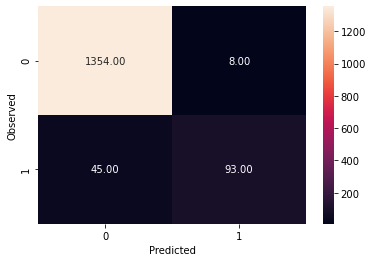

None

Recall: 0.6739130434782609

Precision: 0.9207920792079208

F1 Score: 0.7782426778242678

Roc Auc Score: 0.8340196641767221


In [64]:
#Lets also print the Training, Testing accuracy, Confusion matric heat map, Recall, Precison, F1 Score and Roc AUC Score
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

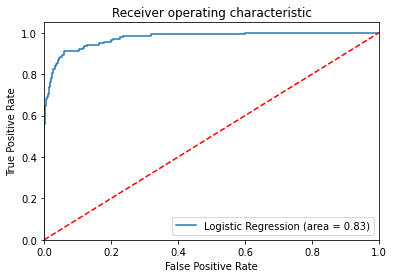

In [65]:
#as we also learned in our mentor sessions we can print the ROC curve
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [66]:
## Find out coefficients of all the attributes and show the output in a data frame with column names
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
9,Education_3,3.39
8,Education_2,3.18
11,CD Account_1,2.85
6,Family_3,1.74
7,Family_4,1.65
13,CreditCard_1,0.76
12,Online_1,0.52
10,Securities Account_1,0.47
14,Mortgage_Account_1,0.43
3,CCAvg,0.18


## LOGISTIC REGRESSION model for Customer data model 2

In [67]:
#first lets copy the data into a new model dataframe
cust_model2 = cust_data_model2.copy()

In [68]:
#Lets quickly check this dataframe to make sure our copy went well :-)
cust_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               5000 non-null   int64   
 1   Experience        5000 non-null   int64   
 2   Income            5000 non-null   int64   
 3   Family            5000 non-null   category
 4   CCAvg             5000 non-null   float64 
 5   Education         5000 non-null   category
 6   Mortgage          5000 non-null   int64   
 7   Personal Loan     5000 non-null   category
 8   Online            5000 non-null   category
 9   Mortgage_Account  5000 non-null   category
dtypes: category(5), float64(1), int64(4)
memory usage: 220.4 KB


In [69]:
# Defining our X and Y variables so we can start building our logistic regression model.  we need to drop the dependent var
# from the X variable and put it in the Y varaible. also make sure it is a categorical variable 

X = cust_model2.drop('Personal Loan', axis=1)
Y = cust_model2['Personal Loan'].astype('category')     

In [70]:
#lets quickly check X
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Online,Mortgage_Account
0,25,1,49,4,1.6,1,0,0,0
1,45,19,34,3,1.5,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,1,0
4996,30,4,15,4,0.4,1,85,1,1
4997,63,39,24,2,0.3,3,0,0,0
4998,65,40,49,3,0.5,2,0,1,0


In [71]:
#lets quickly check Y
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: category
Categories (2, int64): [0, 1]

In [72]:
#Convert categorical vriables to dummy variables. also doing the drop first to get rid of unecessary columns 
X = pd.get_dummies(X, drop_first=True)

In [73]:
X

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Online_1,Mortgage_Account_1
0,25,1,49,1.6,0,0,0,1,0,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,1,0,0,0
4,35,8,45,1.0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,0,1,1,0
4996,30,4,15,0.4,85,0,0,1,0,0,1,1
4997,63,39,24,0.3,0,1,0,0,0,1,0,0
4998,65,40,49,0.5,0,0,1,0,1,0,1,0


### Splitting the Train and Test Data with 70:30 ratio and build the logistic regression Model

In [74]:
##Split into training and test set with 70:30 ratio with random state as 7
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [75]:
#Lets also import all the functions from sklearn as we will be using them going forward

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

#I was getting max_iteration error so i set it to a big number and the error went away

logreg = LogisticRegression(random_state=7, max_iter=10000)
# fit the model on train data
logreg.fit(X_train, y_train)                    

LogisticRegression(max_iter=10000, random_state=7)

In [76]:
#if we need we can change the threshold value of the probabilities

In [77]:
 # Nows lets predict the target variable y_predict on test data
y_predict = logreg.predict(X_test)             

In [78]:
# Observe the predicted and observed classes (Personal Loan Status) in a dataframe.

z = X_test.copy()
z['Observed Personal Loan Status'] = y_test
z['Predicted Personal Loan Status'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Online_1,Mortgage_Account_1,Observed Personal Loan Status,Predicted Personal Loan Status
3406,42,12,34,2.0,0,0,1,0,0,1,0,0,0,0
757,52,28,81,1.8,0,0,1,0,1,0,0,0,0,0
3624,58,28,70,1.4,0,0,0,0,0,1,0,0,0,0
4544,28,4,80,2.5,0,0,1,0,0,0,1,0,0,0
3235,60,35,39,1.6,0,1,0,0,0,1,1,0,0,0


In [79]:
z.head(5)

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Online_1,Mortgage_Account_1,Observed Personal Loan Status,Predicted Personal Loan Status
3406,42,12,34,2.0,0,0,1,0,0,1,0,0,0,0
757,52,28,81,1.8,0,0,1,0,1,0,0,0,0,0
3624,58,28,70,1.4,0,0,0,0,0,1,0,0,0,0
4544,28,4,80,2.5,0,0,1,0,0,0,1,0,0,0
3235,60,35,39,1.6,0,1,0,0,0,1,1,0,0,0


### Metrics for model accuracy

- Print all the metrics related toevaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusionmatrix

- Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rowswhere the predicted class is not equal to the observed class.

In [80]:
#First lets  quickly answer the question - show all the rowswhere the predicted class is not equal to the observed class.

newz = z.copy()

In [81]:
newz = pd.DataFrame()
rows = 0
for i in range(len(z)):

    if z['Observed Personal Loan Status'].values[i] != z['Predicted Personal Loan Status'].values[i]:
        newz = newz.append(z.iloc[i])
        rows = rows+1
        

print("All rows where the predicted class is not equal to the observed class:")
print()
print(rows)
print()
print(newz)
        

All rows where the predicted class is not equal to the observed class:

60

       Age  CCAvg  Education_2  Education_3  Experience  Family_2  Family_3  \
4301  49.0   1.10          0.0          0.0        24.0       0.0       0.0   
4575  53.0   0.50          0.0          1.0        27.0       1.0       0.0   
78    54.0   2.60          0.0          1.0        30.0       1.0       0.0   
3383  46.0   4.10          0.0          0.0        22.0       0.0       1.0   
459   35.0   3.00          0.0          0.0        10.0       1.0       0.0   
1731  43.0   2.40          0.0          0.0        19.0       0.0       1.0   
2447  44.0   8.80          0.0          0.0        19.0       1.0       0.0   
1901  43.0   6.67          0.0          0.0        19.0       1.0       0.0   
2996  42.0   3.33          0.0          0.0        18.0       0.0       0.0   
3983  39.0   3.60          0.0          1.0        13.0       0.0       0.0   
1793  35.0   0.80          0.0          1.0         9.0

In [82]:
## Let us now draw the confusion matrix in a proper format. we can first write a new function based on mentored learning sessions we had
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9542857142857143

Testing accuracy 0.96

Confusion Matrix


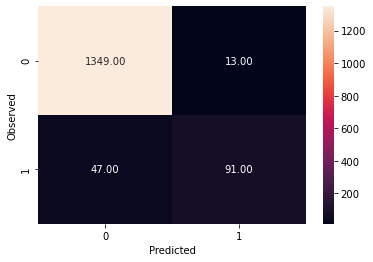

None

Recall: 0.6594202898550725

Precision: 0.875

F1 Score: 0.7520661157024794

Roc Auc Score: 0.8249377513886229


In [83]:
#Lets also print the Training, Testing accuracy, Confusion matric heat map, Recall, Precison, F1 Score and Roc AUC Score
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

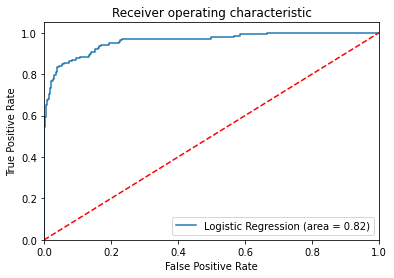

In [84]:
#as we also learned in our mentor sessions we can print the ROC curve
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [85]:
## Find out coefficients of all the attributes and show the output in a data frame with column names
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
9,Education_3,3.51
8,Education_2,3.37
6,Family_3,1.77
7,Family_4,1.56
11,Mortgage_Account_1,0.42
5,Family_2,0.31
3,CCAvg,0.19
10,Online_1,0.10
1,Experience,0.06
2,Income,0.06


# Business Insights on the two models

#####  What does Confusion matrix means here

*True Positive (observed=1,predicted=1):*

Predicted that the customer will take the personal loan and in reality they did take the loan

*False Positive (observed=0,predicted=1):*

Predicted that the customer will take the personal loan and in reality they did not take the loan

*True Negative (observed=0,predicted=0):*

Predicted that the customer will not take the personal loan and in reality they did not take the loan

*False Negative (observed=1,predicted=0):*

Predicted that the customer will not take the personal loan and in reality they did take the loan

##### Important Features

based on the model the top most important features of this model and that seem to have the most influence based on thw coefficient are the following:


Education_3

Education_2

Family_3

Family_4

Mortgage_Account

##### Metrics and my final Analysis

The objective for the Thera bank is to come up with a model that will allow them to target customers that are most likely to take personal loan. the model should give them enough info about customers so that they can target their marketing dollars and campaigns to a more specific kind of customers so they can have a better success ratio that their last campaign with a minimal budget

Obviously a good model in this case will be something that has high accuracy as that will give us good predictions of TP and TN and help bank market to the right customers.

The False positives (FPs) represent a case where prediction is telling us that the customer will take the loan where as in real life they will not. this might result in wasted marketing dollars for Thera bank. 

on the flip side False Negatives (FNs) are also important as if bank does not market to those people then the Thera bank will miss out on the business opportunity

In this case FPs and FNs do not carry high business risk other than wasted marketing dollars or missed business. That being said the model should try to obviously find the right balance to keep both of them low. this means we should try to create a model with a higher F1 Score as we try to get high precision and recall.

So in my view the model should have high Accuracy and high F1 Score

****My Notes***

*******************

Accuracy --> total correct predictions / total obeserved predictions

Precison-- > relates to false postive rates

Recall --> relates to false negatives

Model #1 numbers

TP = 93
TN = 1354
FP = 8
FN = 45

Training accuracy 0.9582857142857143

Testing accuracy 0.9646666666666667

Recall: 0.6739130434782609

Precision: 0.9207920792079208

F1 Score: 0.7782426778242678

Roc Auc Score: 0.8340196641767221

************

we executed two logistic regression models. Both of them resulted in very similar conclusions and metrics. Model #1 was slightly better than Model #2 in all metrics. however Model #2 took fewer features in input and that mean less computational effort. so in all purposes both models can be used. 

Both models has very high accuracy  and F1 Score which is a very good thing and will Thera bank really good info on which customers they should target. Our model also has a good RoC AUC score indicating that the model will be able to competently predict the right binary classifier. However I think we can always work further on our model to improve/increase the recall number so that we can reduce False Negatives and hence not miss marketing to the right people. 

In my opinion, Thera bank should used Model #1 from this project. once it executes this model it will be able to predict which costomers are more likely to take the loans and then they should target their marketing campaigns/dollars at those customers. 

Based on the coefficients for the attributes it clearly seems that Thera bank should pay attention to the Education Level, Family Size and whether they have a mortgage account or not before planning their marketing campaigns.